In [2]:
# Importando as bibliotecas necessárias e o dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

df = pd.read_csv("./Premier-League/premier_league2001-2021.csv")

# Medidas de tendência central e de variabilidade

## Medidas para o dataset original

In [3]:
# Medidas de tendencia central e variablidade de cada coluna

dataframe_stats = df.describe()

print(dataframe_stats)

              FTHG         FTAG         HTGS         ATGS         HTGC  \
count  7980.000000  7980.000000  7980.000000  7980.000000  7980.000000   
mean      1.520551     1.149749    24.561153    24.707268    24.717920   
std       1.297738     1.138600    17.271724    17.258132    16.487186   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000    11.000000    11.000000    11.000000   
50%       1.000000     1.000000    23.000000    23.000000    23.000000   
75%       2.000000     2.000000    35.000000    36.000000    36.000000   
max       9.000000     9.000000   102.000000   105.000000    85.000000   

              ATGC          HTP          ATP          HSA          ASA  ...  \
count  7980.000000  7980.000000  7980.000000  7980.000000  7980.000000  ...   
mean     24.512782     1.212497     1.228256   222.414912   223.720677  ...   
std      16.406425     0.537867     0.532069   140.684941   140.815904  ...   
min       0.00000

## Medidas para alguns casos específicos

In [4]:
colunas_escolhidas = ["HTGD", "ATGD", "DiffPts", "DiffFormPts"]
df_filtrado = df[colunas_escolhidas]
print("Estatísticas normais")
print(df_filtrado.describe())
print()
df_HomeWins = df_filtrado[df["FTR"] == "H" ]
print("Time da casa ganha")
print(df_HomeWins.describe())
print()
df_HomeWins = df_filtrado[df["FTR"] == "D" ]
print("Time da casa empata")
print(df_HomeWins.describe())
print()
df_HomeWins = df_filtrado[df["FTR"] == "A" ]
print("Time da casa perde")
print(df_HomeWins.describe())

Estatísticas normais
              HTGD         ATGD      DiffPts  DiffFormPts
count  7980.000000  7980.000000  7980.000000  7980.000000
mean     -0.013306     0.013716    -0.015759    -0.168296
std       0.714406     0.710295     0.680166     4.548509
min      -3.000000    -3.333333    -2.363636   -15.000000
25%      -0.500000    -0.473684    -0.454545    -3.000000
50%      -0.076923    -0.044466     0.000000     0.000000
75%       0.400000     0.428571     0.432432     3.000000
max       4.000000     3.500000     2.285714    15.000000

Time da casa ganha
              HTGD         ATGD      DiffPts  DiffFormPts
count  3673.000000  3673.000000  3673.000000  3673.000000
mean      0.155667    -0.144975     0.209905     1.111625
std       0.758399     0.638629     0.650458     4.421003
min      -3.000000    -3.000000    -2.000000   -13.000000
25%      -0.375000    -0.555556    -0.208333    -2.000000
50%       0.057143    -0.200000     0.193548     1.000000
75%       0.666667     0.189189

# Estatísticas de resultado por temporada e agregado

## Gráfico de barras

Text(0.5, 0, 'Season')

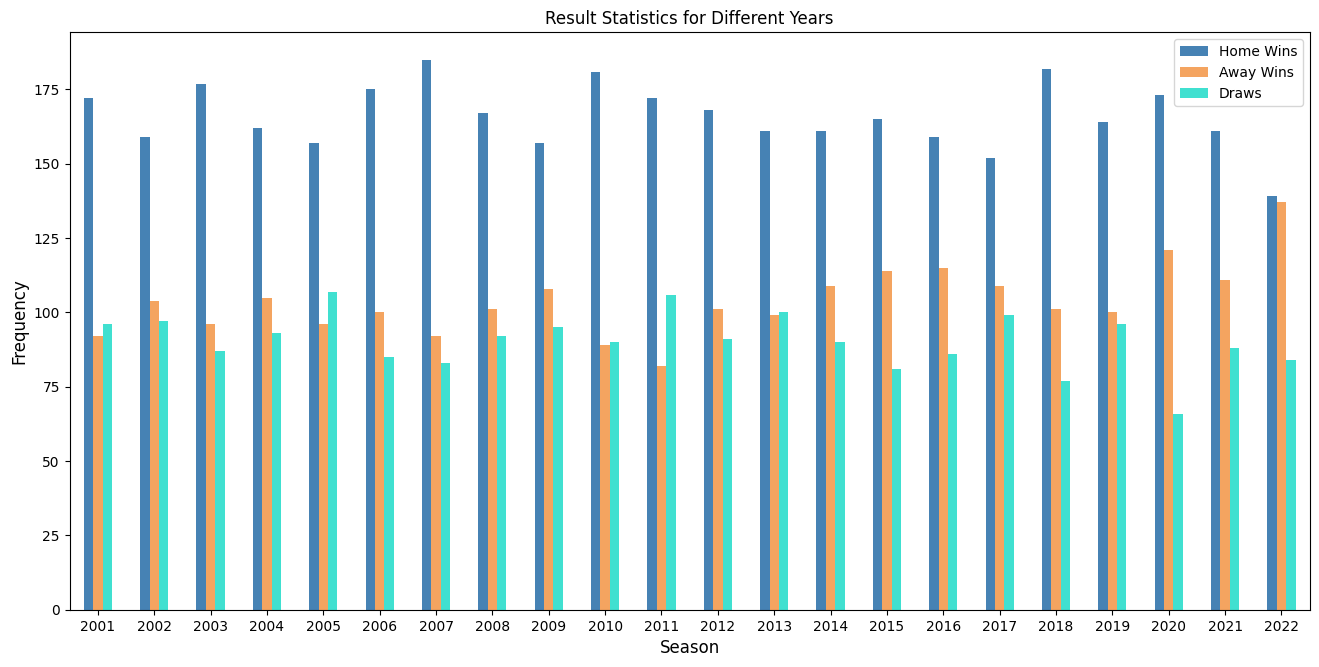

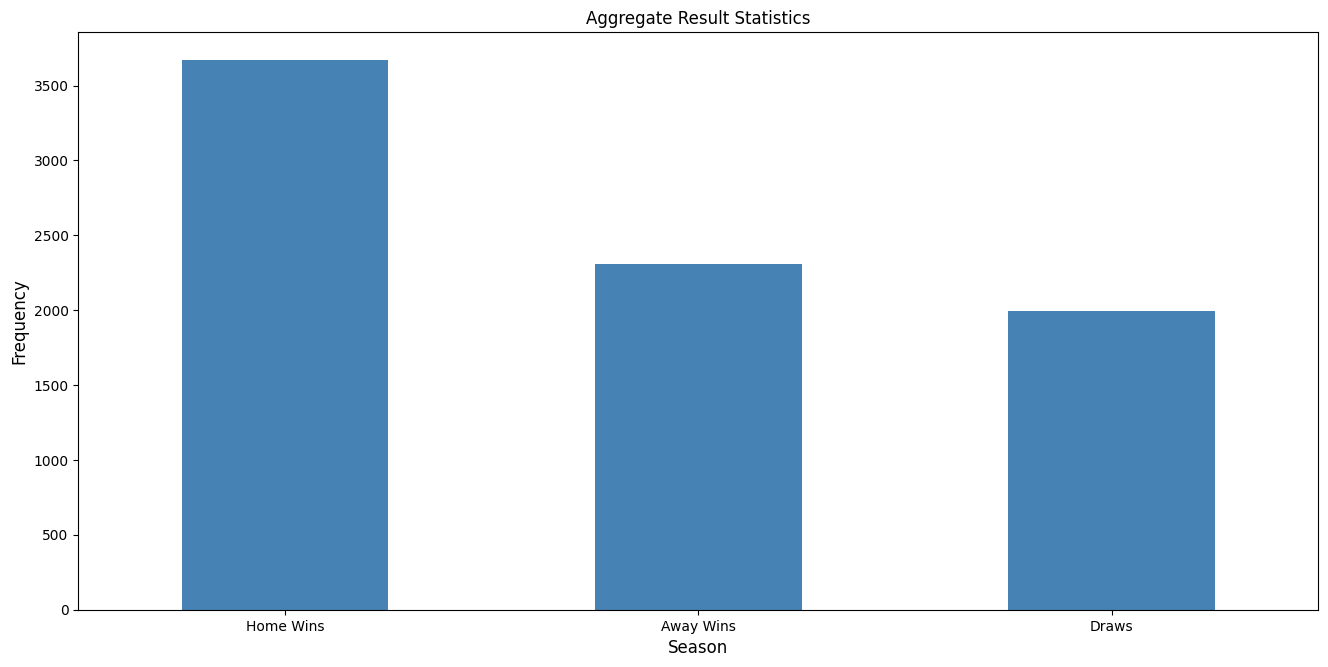

In [5]:
# Função para conseguir a estatística dos resultados de um dataframe
def get_result_stats(playing_stats, year):
    return pd.DataFrame(data = [ len(playing_stats[playing_stats.FTR == 'H']),
                                 len(playing_stats[playing_stats.FTR == 'A']),
                                 len(playing_stats[playing_stats.FTR == 'D'])],
                        index = ['Home Wins', 'Away Wins', 'Draws'],
                        columns =[year]
                       ).T
# Vitorias, Empates e Derrota por temporada

lista_stats = []
for indice in range(22):
  ano = str( indice + 2001 )
  stats = get_result_stats( df.iloc[ indice*360 : (1+indice)*360] , ano)
  lista_stats.append(stats)

result_stats = pd.concat(lista_stats)
result_stats_agg = get_result_stats( df , "Agregado" )

# Plotando o dataframe de resultado por temporada
ax = result_stats.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5],
                       title='Result Statistics for Different Years')
plt.xticks(rotation=0)
ax.set_ylabel('Frequency', size=12)
ax.set_xlabel('Season', size=12)

# Plotando o dataframe de resultado agregado
ax1 = result_stats_agg.T.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5],
                       title='Aggregate Result Statistics', legend = False)
plt.xticks(rotation=0)
ax1.set_ylabel('Frequency', size=12)
ax1.set_xlabel('Season', size=12)


## Gráfico de linhas

           2001       2002       2003       2004       2005       2006  \
Home  45.263158  41.842105  46.578947  42.631579  41.315789  46.052632   
Away  24.210526  27.368421  25.263158  27.631579  25.263158  26.315789   
Draw  25.263158  25.526316  22.894737  24.473684  28.157895  22.368421   

           2007       2008       2009       2010  ...       2013       2014  \
Home  48.684211  43.947368  41.315789  47.631579  ...  42.368421  42.368421   
Away  24.210526  26.578947  28.421053  23.421053  ...  26.052632  28.684211   
Draw  21.842105  24.210526  25.000000  23.684211  ...  26.315789  23.684211   

           2015       2016       2017       2018       2019       2020  \
Home  43.421053  41.842105  40.000000  47.894737  43.157895  45.526316   
Away  30.000000  30.263158  28.684211  26.578947  26.315789  31.842105   
Draw  21.315789  22.631579  26.052632  20.263158  25.263158  17.368421   

           2021       2022  
Home  42.368421  36.578947  
Away  29.210526  36.052632  
Dr

Text(0, 0.5, 'Win Percentage')

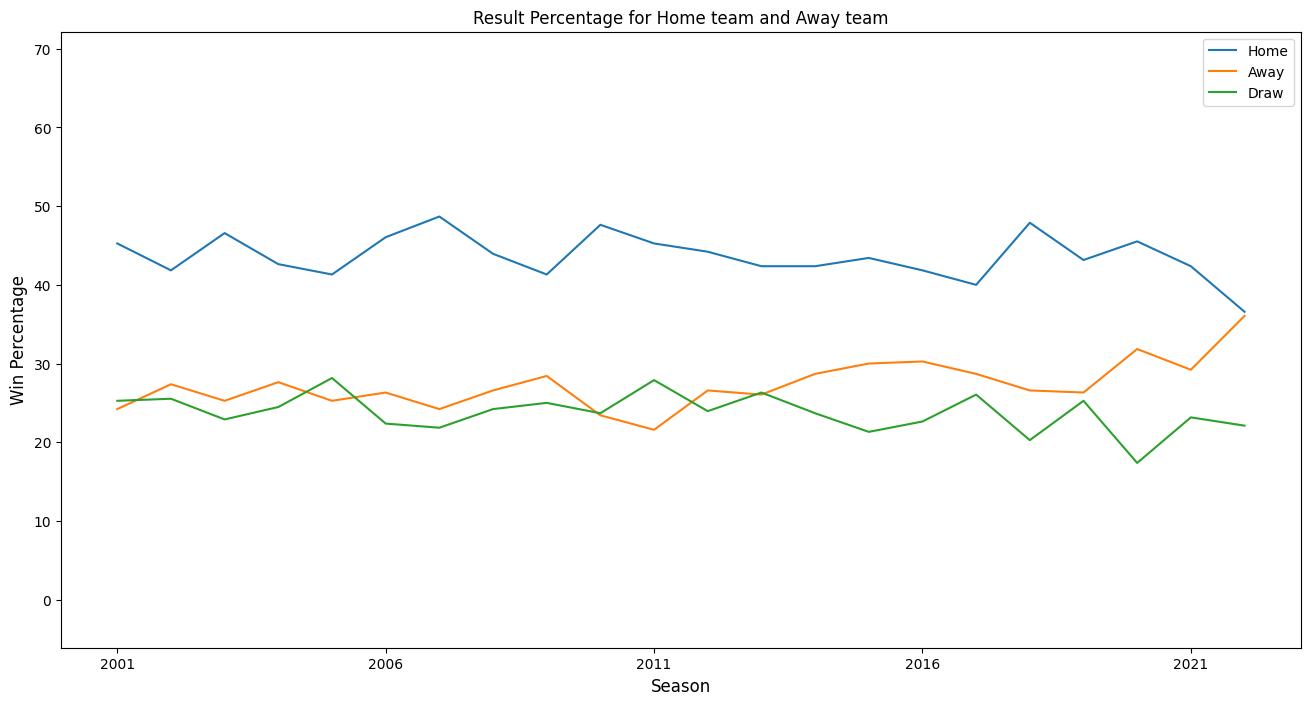

In [6]:
result_prop = result_stats.T

for column in result_prop.columns:
    result_prop[column] = (result_prop[column] * 100) / 380

result_prop.rename(index={'Home Wins':'Home', 'Away Wins':'Away', 'Draws':'Draw'}, inplace=True)

print(result_prop)

ax = result_prop.T.plot(figsize = [16,8], title = 'Result Percentage for Home team and Away team')
ax.margins(y=.75)
ax.set_xlabel('Season', size =12)
ax.set_ylabel('Win Percentage', size =12)

# Análise de porcentagem de vitórias levando em conta WinStreaks ou LossStreak

## HomeTeam

Text(0.5, 0, 'HomeTeam')

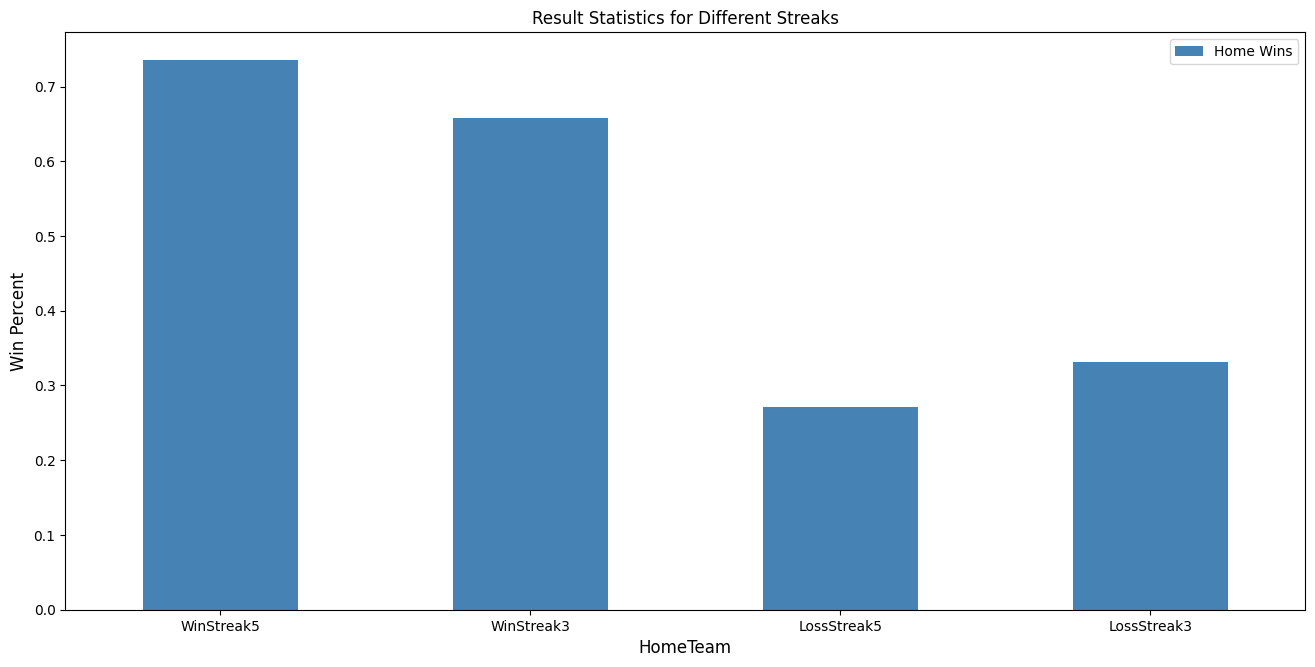

In [7]:
col_names = ["HTWinStreak5", "ATWinStreak5", "HTWinStreak3", "ATWinStreak3", "HTLossStreak5", "ATLossStreak5", "HTLossStreak3", "ATLossStreak3"]

lista_streaks = []
# Calculando a porcentagem de vitórias dos times de casa e visitante para cada Streak
for i in range(0,8,2):
  col1 = col_names[i]
  col2 = col_names[i+1]
  df_HTs = df[df[col1] == 1]
  df_ATs = df[df[col2] == 1]
  n1 = len(df_HTs)
  n2 = len(df_ATs)
  w1 = len(df_HTs[df_HTs["FTR"] == "H"])
  w2 = len(df_ATs[df_ATs["FTR"] == "A"])

  df_StreakStats = pd.DataFrame(data = [ w1/n1],
                        index = ['Home Wins'],
                        columns =[col1[2:]]
                       ).T
  lista_streaks.append(df_StreakStats)

streaks_stats = pd.concat(lista_streaks)
# Plotando o dataframe de streaks
ax = streaks_stats.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5],
                       title='Result Statistics for Different Streaks')
plt.xticks(rotation=0)
ax.set_ylabel('Win Percent', size=12)
ax.set_xlabel('HomeTeam', size=12)


## AwayTeam

Text(0.5, 0, 'AwayTeam')

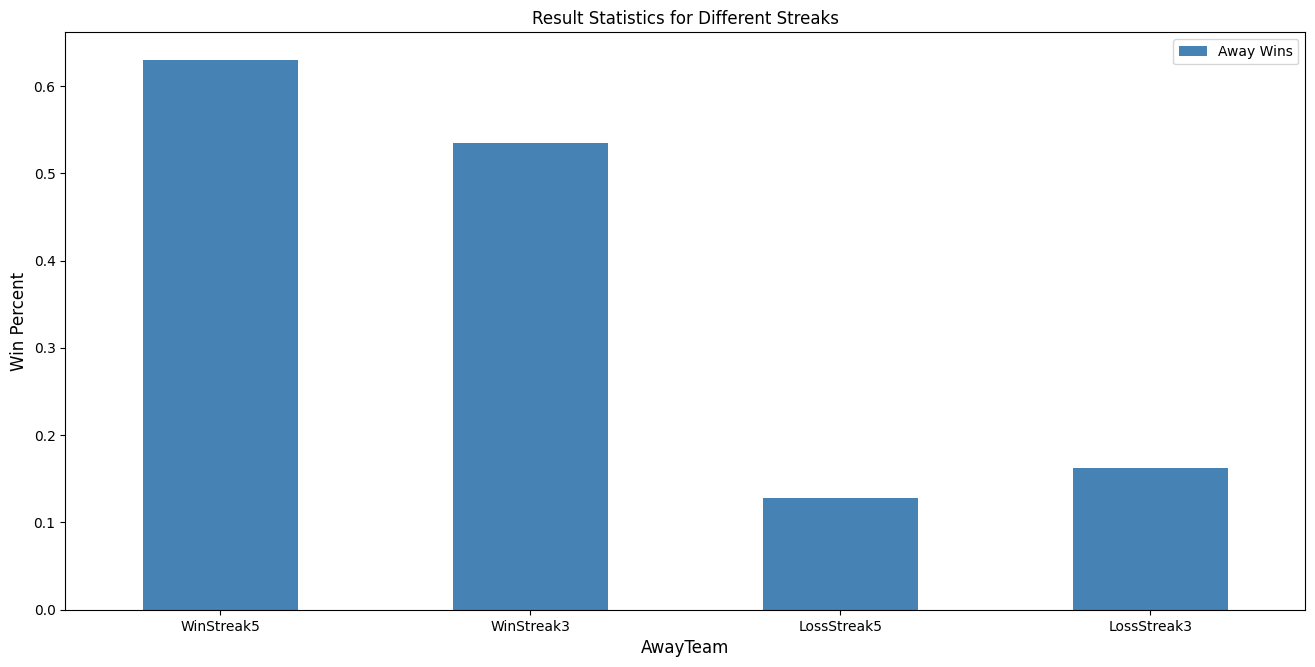

In [8]:
col_names = ["HTWinStreak5", "ATWinStreak5", "HTWinStreak3", "ATWinStreak3", "HTLossStreak5", "ATLossStreak5", "HTLossStreak3", "ATLossStreak3"]

lista_streaks = []
# Calculando a porcentagem de vitórias dos times de casa e visitante para cada Streak
for i in range(0,8,2):
  col1 = col_names[i]
  col2 = col_names[i+1]
  df_HTs = df[df[col1] == 1]
  df_ATs = df[df[col2] == 1]
  n1 = len(df_HTs)
  n2 = len(df_ATs)
  w1 = len(df_HTs[df_HTs["FTR"] == "H"])
  w2 = len(df_ATs[df_ATs["FTR"] == "A"])

  df_StreakStats = pd.DataFrame(data = [ w2/n2],
                        index = ['Away Wins'],
                        columns =[col1[2:]]
                       ).T
  lista_streaks.append(df_StreakStats)

streaks_stats = pd.concat(lista_streaks)
# Plotando o dataframe de streaks
ax = streaks_stats.plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5],
                       title='Result Statistics for Different Streaks')
plt.xticks(rotation=0)
ax.set_ylabel('Win Percent', size=12)
ax.set_xlabel('AwayTeam', size=12)


# Comparação de resultado da partida agrupado pela diferença de colocação na ultima temporada entre o time de casa e visitante

Text(0, 0.5, 'Win Percentage')

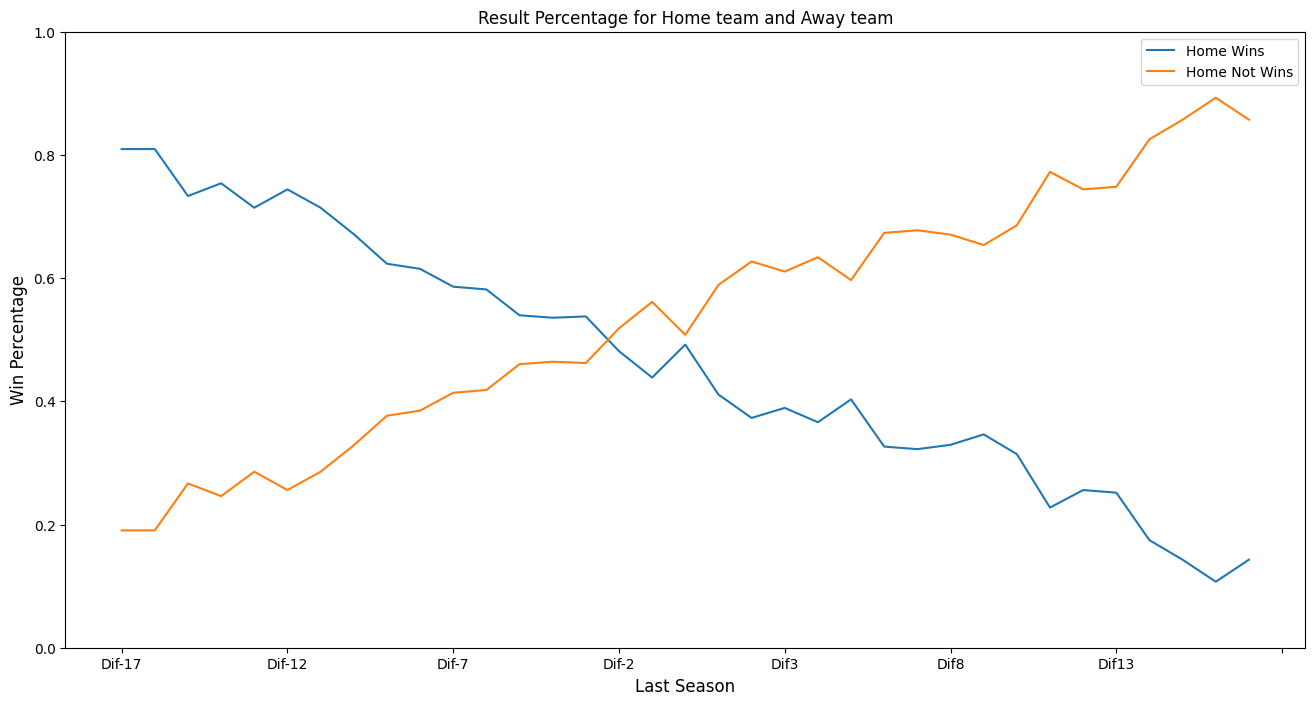

In [9]:
# Casos em que o time da casa teve melhor colocação na temporada passada
df_linhas = pd.DataFrame()
lista_dif = []
for posi_dif in range(-17, 18):
  df_filtrado = df[df["DiffLP"] == posi_dif]
  df_difHome = get_result_stats( df_filtrado , "Dif" + str(posi_dif))
  lista_dif.append(df_difHome / len(df_filtrado))

dif_stats = pd.concat(lista_dif)
dif_stats["Home Not Wins"] = dif_stats["Away Wins"] + dif_stats["Draws"]
dif_stats = dif_stats[["Home Wins", "Home Not Wins"]]
# Plotando o dataframe
ax = dif_stats.plot(figsize = [16,8], title = 'Result Percentage for Home team and Away team')
ax.margins(y=.75)
ax.set_ylim(0, 1)
ax.set_xlabel('Last Season', size =12)
ax.set_ylabel('Win Percentage', size =12)

# Resultado das partidas baseado na vantagem de pontos com relação as ultimas 5 partidas

Text(0, 0.5, 'Win Percentage')

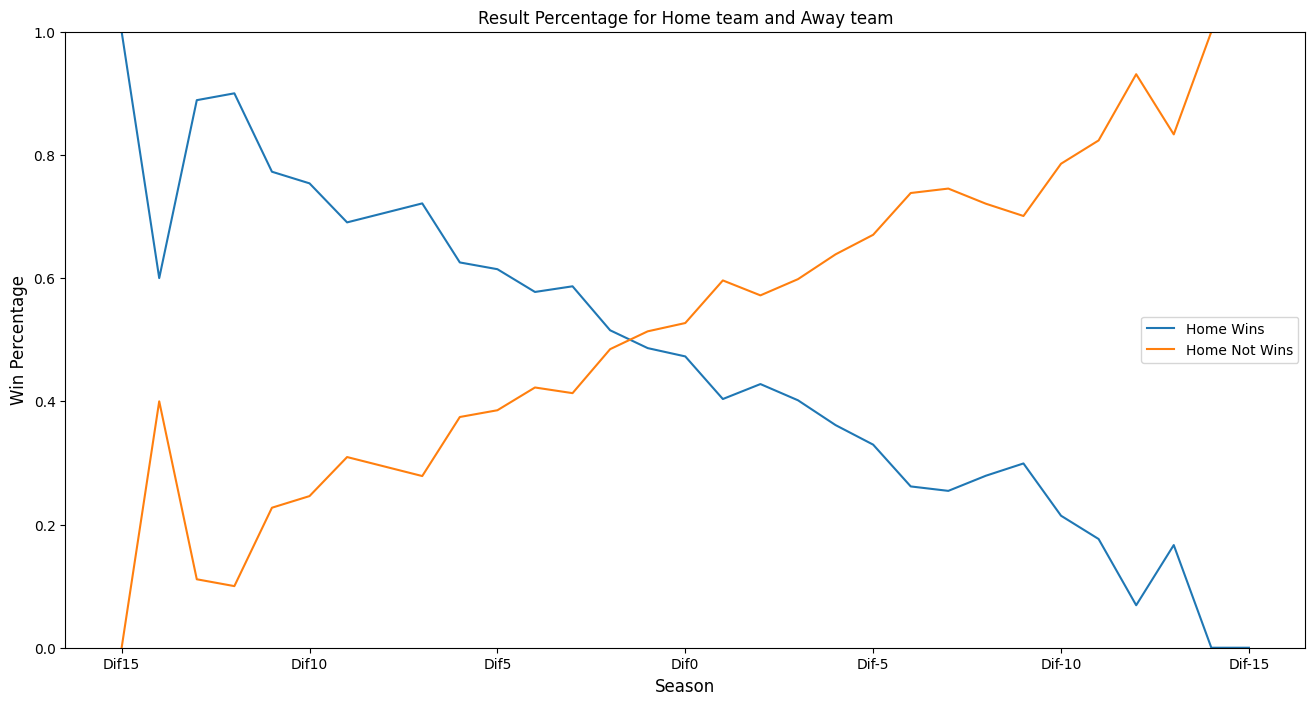

In [10]:
# Resultado da partida baseado na vantagem de pontos do time de casa nas ultimas 5 partidas
lista_difPts = []
for points_dif in range(15, -16, -1):
  df_filtrado = df[~df['HTFormPtsStr'].str.contains('M')]
  df_filtrado = df_filtrado[df_filtrado["DiffFormPts"] == points_dif]

  df_difHome = get_result_stats( df_filtrado , "Dif" + str(points_dif))
  lista_difPts.append(df_difHome / len(df_filtrado))

dif_stats = pd.concat(lista_difPts)
dif_stats["Home Not Wins"] = dif_stats["Away Wins"] + dif_stats["Draws"]
dif_stats = dif_stats[["Home Wins", "Home Not Wins"]]
# Plotando o dataframe
ax = dif_stats.plot(figsize = [16,8], title = 'Result Percentage for Home team and Away team')
ax.margins(y=.75)
ax.set_ylim(0, 1)
ax.set_xlabel('Season', size =12)
ax.set_ylabel('Win Percentage', size =12)

# Estatísticas de resultado com base nas ultimas 3 partidas

In [11]:
lista_last3matches = []
df_filtrado = df[~df['HTFormPtsStr'].str.contains('M')] # Ignorando as partidas das 5 primeiras semanas
df_filtrado = df_filtrado.copy()
df_filtrado.loc[:,'HTFormPtsStr'] = df['HTFormPtsStr'].apply(lambda x: x[:3])
for last5matches in df_filtrado['HTFormPtsStr'].unique():
  dfHome = df[ df['HTFormPtsStr'].apply(lambda x: x[:3]) == last5matches[:3]]
  dfAway = df[ df['ATFormPtsStr'].apply(lambda x: x[:3]) == last5matches[:3]]
  nHome = len(dfHome)
  nAway = len(dfAway)
  dfResultsHome = get_result_stats( dfHome , last5matches[:3] ) / nHome
  dfResultsHome.columns = ["Home Wins", "Home Loses", "Home Draws"]
  dfResultsAway = get_result_stats( dfAway , last5matches[:3] ) / nAway
  dfResultsAway.columns = ["Away Loses", "Away Wins", "Away Draws"]
  df_concat = pd.concat( [dfResultsHome, dfResultsAway] , axis = 1 )
  df_concat["Home Matches"] = nHome
  df_concat["Away Matches"] = nAway
  lista_last3matches.append(df_concat)

df_final = pd.concat( lista_last3matches )
df_ordenado = df_final.sort_values('Home Wins', ascending = False)
print(df_ordenado)


     Home Wins  Home Loses  Home Draws  Away Loses  Away Wins  Away Draws  \
WWW   0.658301    0.164093    0.177606    0.256055   0.534602    0.209343   
WWD   0.608163    0.167347    0.224490    0.329966   0.457912    0.212121   
WDW   0.605691    0.195122    0.199187    0.314103   0.410256    0.275641   
WDD   0.602837    0.212766    0.184397    0.413408   0.296089    0.290503   
WDL   0.598086    0.191388    0.210526    0.416342   0.342412    0.241245   
WLW   0.582734    0.230216    0.187050    0.421788   0.340782    0.237430   
WWL   0.569231    0.221538    0.209231    0.408669   0.356037    0.235294   
WLD   0.497797    0.299559    0.202643    0.484177   0.284810    0.231013   
DWW   0.493333    0.216667    0.290000    0.337255   0.282353    0.380392   
LWW   0.473214    0.279762    0.247024    0.538206   0.252492    0.209302   
LDD   0.471795    0.338462    0.189744    0.541667   0.244048    0.214286   
WLL   0.467320    0.261438    0.271242    0.446384   0.309227    0.244389   

# Top 10 times por porcentagem de vitórias

## Time da casa

Text(0.5, 0, 'Team')

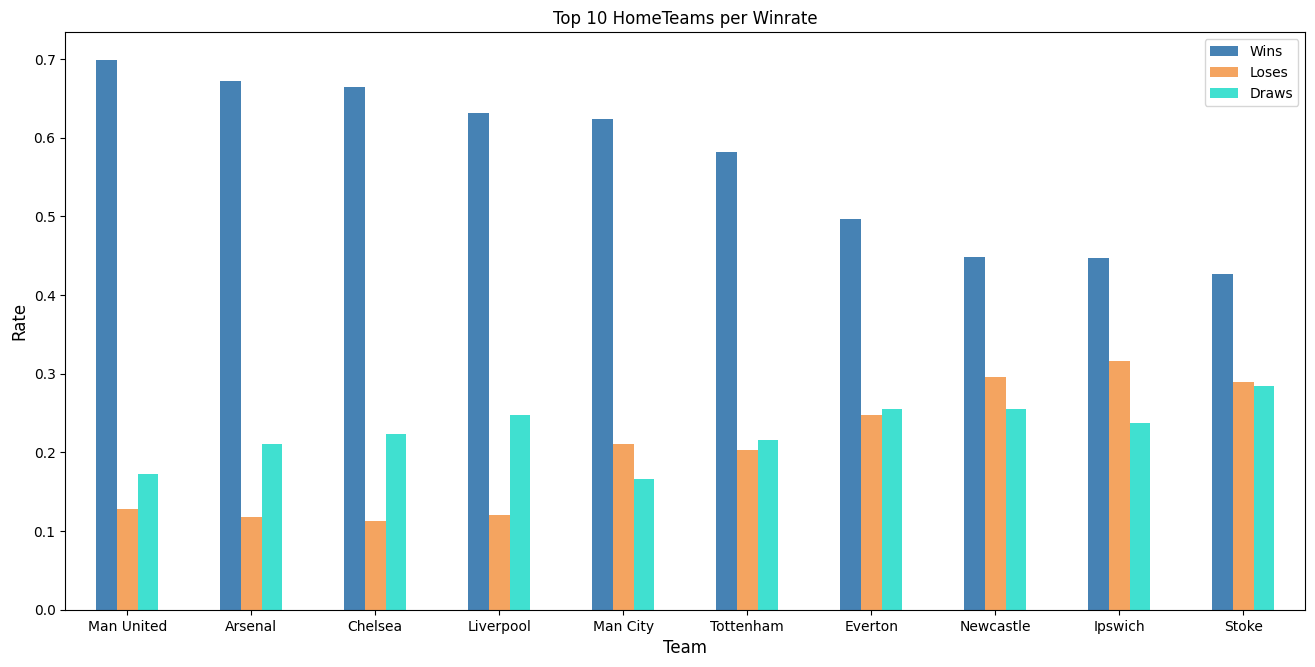

In [12]:
lista_times = []
# Coletando dados de resultado para times da casa
for team in df["HomeTeam"].unique():
  df_filtrado = df[df["HomeTeam"] == team]
  df_resultados = get_result_stats(df_filtrado , team)
  df_resultados.columns = ["Wins", "Loses", "Draws"]
  lista_times.append(df_resultados / len(df_filtrado))

teams_stats = pd.concat(lista_times)
df_ordenado = teams_stats.sort_values('Wins', ascending = False)
# Plotando o dataframe
ax = df_ordenado.head(10).plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5],
                       title='Top 10 HomeTeams per Winrate')
plt.xticks(rotation=0)
ax.set_ylabel('Rate', size=12)
ax.set_xlabel('Team', size=12)

## Time visitante

Text(0.5, 0, 'Team')

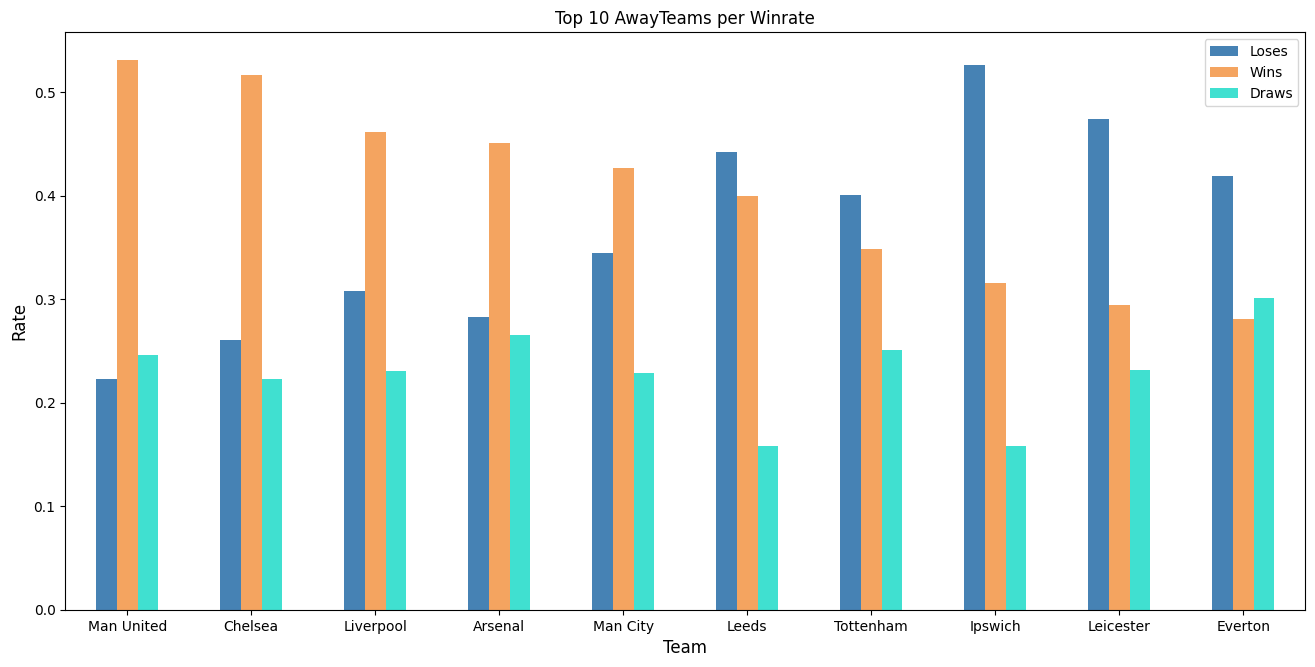

In [13]:
lista_times = []
# Coletando dados de resultado para times visitantes
for team in df["AwayTeam"].unique():
  df_filtrado = df[df["AwayTeam"] == team]
  df_resultados = get_result_stats(df_filtrado , team)
  df_resultados.columns = ["Loses", "Wins", "Draws"]
  lista_times.append(df_resultados / len(df_filtrado))

teams_stats = pd.concat(lista_times)
df_ordenado = teams_stats.sort_values('Wins', ascending = False)
# Plotando o dataframe
ax = df_ordenado.head(10).plot(kind='bar', color = ['steelblue','sandybrown', 'turquoise'], figsize = [16,7.5],
                       title='Top 10 AwayTeams per Winrate')
plt.xticks(rotation=0)
ax.set_ylabel('Rate', size=12)
ax.set_xlabel('Team', size=12)



# Correlações entre alguns atributos

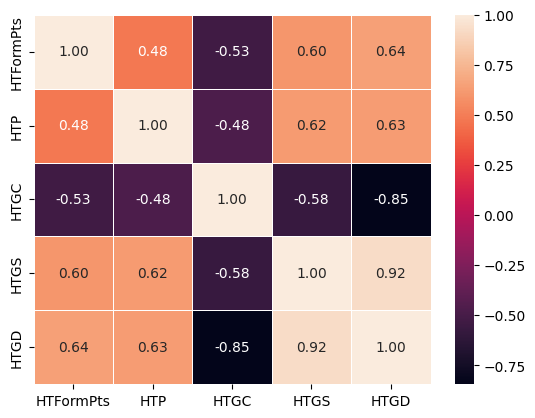

In [14]:
col_names = ["HTFormPts", "HTP", "HTGC", "HTGS"]

df_filtrado = df_filtrado[~df_filtrado['ATFormPtsStr'].str.contains('M')]
atrib1 = df_filtrado["HTFormPts"] / 5 # Média de pontos nas ultimas 5 partidas
atrib2 = df_filtrado["HTP"] / df_filtrado["MW"] # Media de pontos até a rodada atual
atrib3 = df_filtrado["HTGC"] / df_filtrado["MW"] # Média de gols concedidos até a rodada atual
atrib4 = df_filtrado["HTGS"] / df_filtrado["MW"] # Média de gols marcados até a rodada atual
atrib5 = df_filtrado["HTGD"]  # Média de saldo de gols até a rodada atual

df_atributos = pd.DataFrame({"HTFormPts":atrib1, "HTP":atrib2, "HTGC":atrib3, "HTGS":atrib4, "HTGD":atrib5})
correlacoes = df_atributos.corr()
plot = sn.heatmap(correlacoes, annot = True, fmt=".2f", linewidths=.6)